In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


Problem 1:<br>
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.<br>

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years


In [2]:
#Importing dataset

startup=pd.read_csv('50_Startups.csv')
startup


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#dropping the state column

startup.drop(columns=['State'],inplace=True)

In [4]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [5]:
startup.shape

(50, 4)

In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

Comment:<br>
* Data does not contain any null value

In [9]:
#for statistical description of the data

startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
# Calculate the correlation matrix

startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Comment:<br>
* features ->R&D Spend	,Administration	,Marketing Spend
* Target varible -> Profit

In [11]:
# Removing spaces in column names

startup.columns = startup.columns.str.replace(' ', '')

In [12]:
x=startup.iloc[:,:3]    #feature
y=startup.iloc[:,3]     #target variable

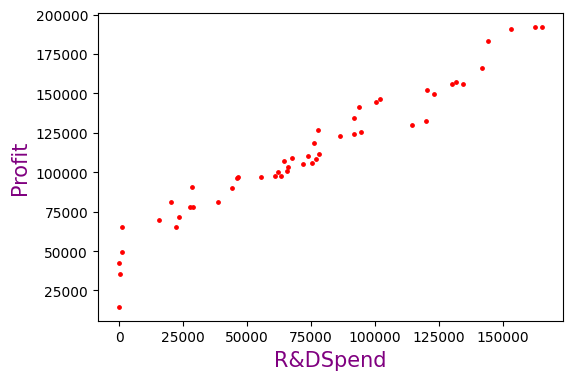

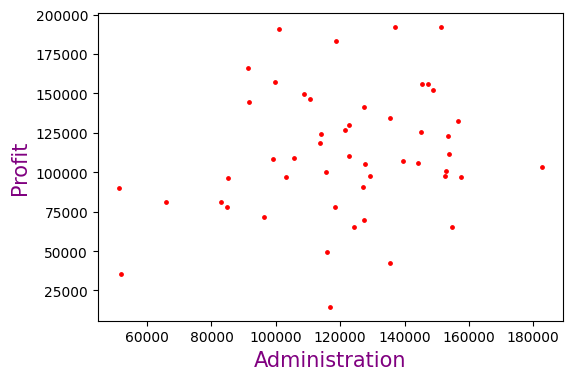

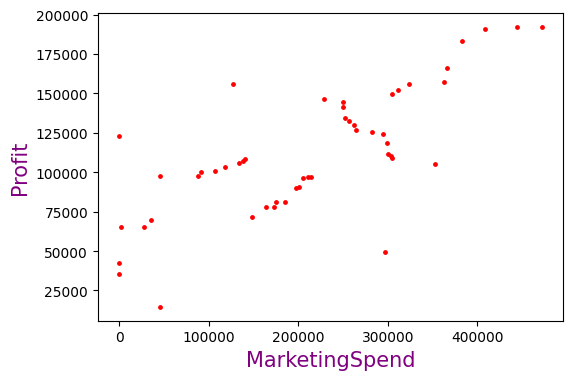

In [13]:
#Determining relationship between the features and the target variable

column=list(x.columns)
for i in column:
  plt.figure(figsize=(6,4))
  plt.scatter(x[i],y,color='red',s=6)
  plt.xlabel(i,color='purple',size=15)
  plt.ylabel('Profit',color='purple',size=15)
  plt.show()

Comment:<br>
As it is a Linear Regression Problem the Target and features shold be Linearly related.
* Here we observe that except Administration, R&DSpend and MarketingSpend are more linearly related to the Profit.


## Assumption 1:-Checking for Multicollinearity
*Multiple linear regression assumes that none of the predictor variables(features) are highly correlated with each other. When one or more predictor variables are highly correlated, the regression model suffers from multicollinearity, which causes the coefficient estimates in the model to become unreliable.

> There are two simple ways to indicate multicollinearity in the dataset .
>> Variance Inflation Factor (VIF).<BR>
>> Heat map or correlation matrix.

### 1) Heat map or correlation matrix--use for checking multicollinearity

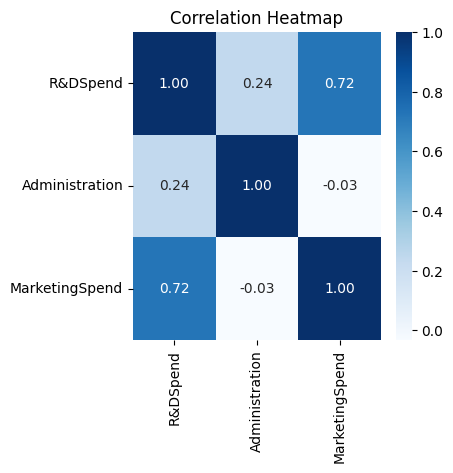

In [14]:
# Calculate the features correlation matrix
corr_matrix = startup[['R&DSpend','Administration','MarketingSpend']].corr()

# Create a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap=plt.cm.Blues)  # annot=True add values to cells
plt.title('Correlation Heatmap')
plt.show()

Comment:
* Here we can observe that features are correlated to each other. <br>and R&D Spend	&	Marketing Spend are having high correlation with 72%.

* but Our Assumption says that Features shold be independent of each other

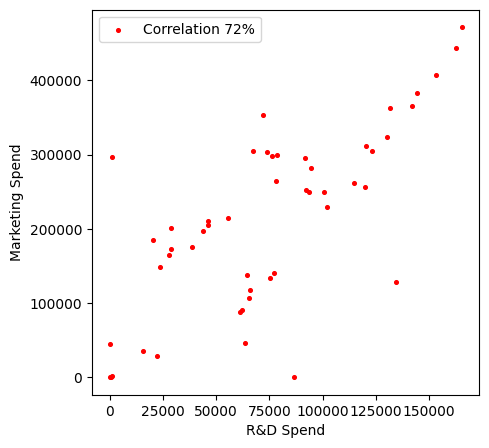

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(startup['R&DSpend'],startup['MarketingSpend'],s=7,color='red',label="Correlation 72%")
plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.legend(loc="best")
plt.show();


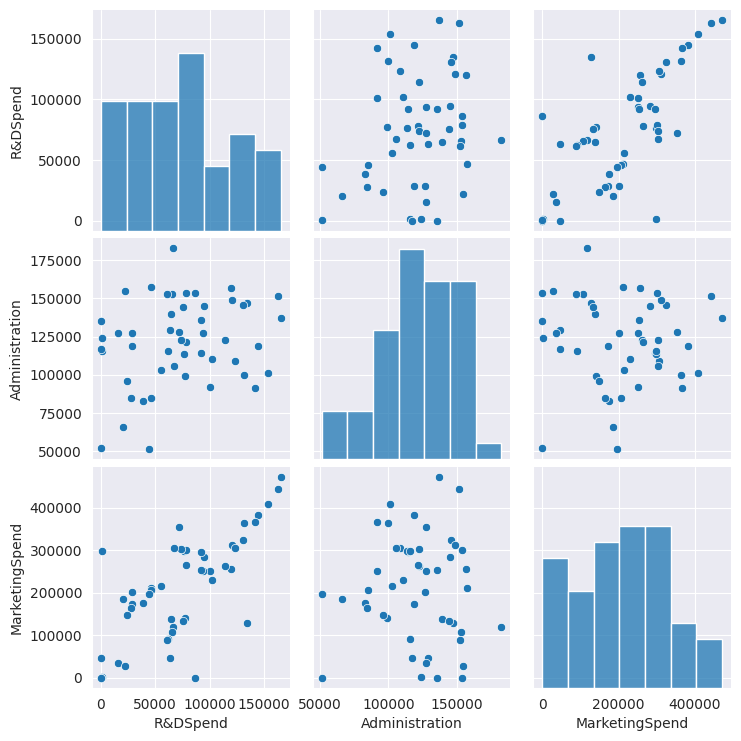

In [16]:
#Plotting each feature against other feature for inference

sns.set_style(style='darkgrid')
sns.pairplot(x)

Comment:<br>
It is showing that features are having some amount of linear relationship between them but we need to remove that as per our assumption 1

## Building a Model without any change in original data

In [17]:
startup.rename(columns={'R&DSpend': 'R_DSpend'}, inplace=True)

In [18]:
startup.columns

Index(['R_DSpend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

In [19]:
model=smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=startup).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.53e-30
Time:                        10:02:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_DSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comment:<br>
* Model is having 95% of accuracy
* But there is some misinterpretibility with the coefficients
* As we know that by the above plotting of feature v/s target variable we saw that there is the positive relationship between the Profit and each feature variable
* but in summary of the model it is showing that the administation is having nagative relationship with profit
* This is happening because of Multicolinearity between the features

### 2) Calculating Variance Inflation Factor (VIF)--use for checking multicollinearity

The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.<br>
> Calculation of VIF-> VIF=1/(1-R^2)
* VIF equal to 1 = variables are not correlated
* VIF between 1 and 5 = variables are moderately correlated
* VIF greater than 5 = variables are highly correlated
* The higher the VIF, the higher the possibility that multicollinearity exists, When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

In [21]:
rsq_R_DSpend=smf.ols('R_DSpend~Administration+MarketingSpend',data=startup).fit().rsquared
vif_R_DSpend=1/(1-rsq_R_DSpend)

rsq_Administration=smf.ols('Administration~R_DSpend+MarketingSpend',data=startup).fit().rsquared
vif_Administration=1/(1-rsq_Administration)


rsq_MarketingSpend=smf.ols('MarketingSpend~R_DSpend+Administration',data=startup).fit().rsquared
vif_MarketingSpend=1/(1-rsq_MarketingSpend)

#Storing VIF values in the dataframe
df={'Featres':['R_DSpend','Administration','MarketingSpend'],'VIF':[vif_R_DSpend,vif_Administration,vif_MarketingSpend]}
vif_df=pd.DataFrame(df)
vif_df

,Featres,VIF
0,R_DSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


Comment:<br>
* There exist some amount of multicollinearity ,but as it is less than 5 ,it is fine.
* No treatment for multicollinearity.

## Assumption 2:- Residual Analysis
Performing residual analysis to determine if the errors (residuals) are normally distributed with a mean of 0

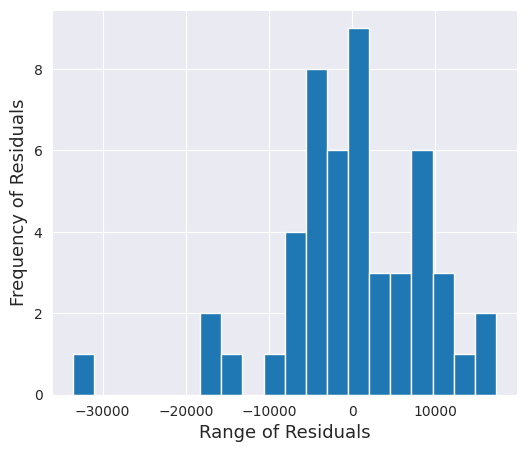

In [22]:
plt.figure(figsize=(6,5))
plt.hist(model.resid,bins=20)
plt.xlabel('Range of Residuals',size=13)
plt.ylabel('Frequency of Residuals',size=13)
plt.show();

Comment:<br>
* It is not bell shaped curve.
* That means error are not normally distributed around the mean zero.
* Assumption is not satisfied Therefore the model requires the transformation

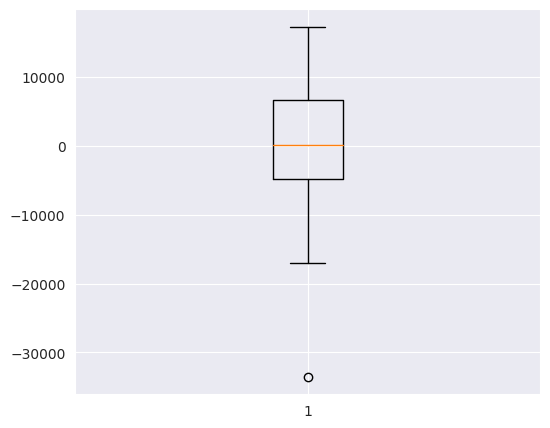

In [23]:
plt.figure(figsize=(6,5))
plt.boxplot(model.resid)
plt.show();

In [ ]:
# here mean is zero for errors

## Assumption 3:-Homoscedasticity
This assumption states that the variance of error terms should be similar across the values of the independent variables or we can say that variance of error shuld be constant as it should not change with prediction.<br> A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

In [24]:
#defining a function for standardising values
#The purpose of standardization is to ensure that all the variables are on the same scale,
#which can make it easier to interpret the coefficients and compare the importance of different predictors.

def get_standardize_values(vals):
  return (vals-vals.mean())/vals.std()

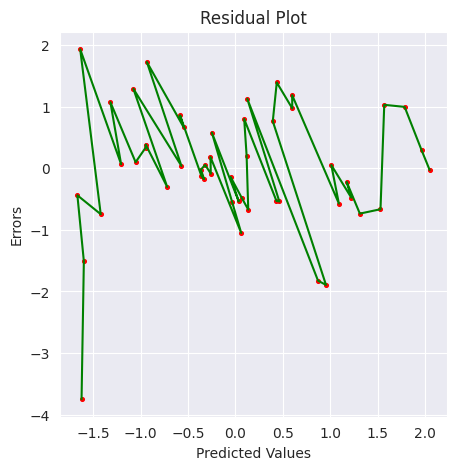

In [25]:
#Plotting predicted values versus residuals

plt.figure(figsize=(5,5))
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid),s=7,color='red')
plt.plot(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid),color='green')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.show()

Comment:<br>

* Residual vs. Fitted Values Plot: This plot compares the residuals to the predicted values. In a homoscedastic dataset, the spread of residuals should be roughly constant across all levels of predicted values. If the spread of residuals widens or narrows systematically as you move along the predicted values, it suggests heteroscedasticity.

* Here we can observe that the plot is randomly scattered there is not any pattern followed ,therefore it is  Homoscedasticity and Assumption fulfilled.

* There is one potential Outlier which can be ignored as given the data size is just 50

* Also the variance of error is not  exactly constant there is some level of variation in the error


## Assumption 4:- Errors and Features should be independent

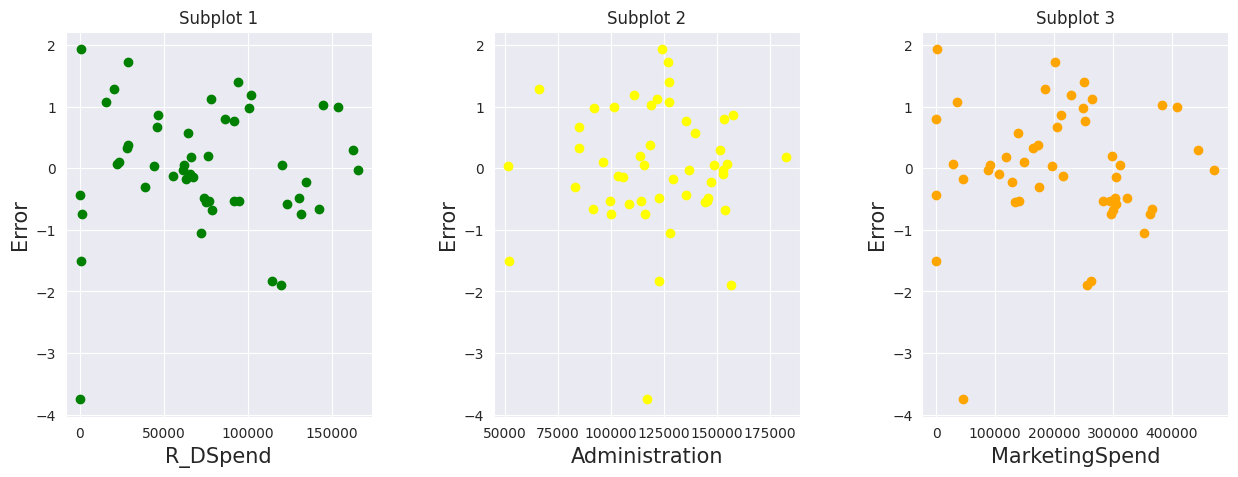

In [26]:
# Creating subplots

plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Create the first subplot
plt.subplot(1, 3, 1)
plt.scatter(startup['R_DSpend'],
            get_standardize_values(model.resid),color='green')
plt.title('Subplot 1')
plt.xlabel('R_DSpend',size=15)
plt.ylabel('Error',size=15)

# Create the second subplot
plt.subplot(1, 3, 2)
plt.scatter(startup['Administration'],
            get_standardize_values(model.resid),color='yellow')
plt.title('Subplot 2')
plt.xlabel('Administration',size=15)
plt.ylabel('Error',size=15)

# Create the second subplot
plt.subplot(1, 3, 3)
plt.scatter(startup['MarketingSpend'],
            get_standardize_values(model.resid),color='orange')
plt.title('Subplot 3')
plt.xlabel('MarketingSpend',size=15)
plt.ylabel('Error',size=15)
# Show the figure with subplots
plt.show()


Comment:<br>
* Here we can observe that the plots are randomly scattered that is there is no linear relationship between features and error.
* Therefore assumption that the errors and features should be independent of each other is satisfying

## Outlier Detection
 Using Cook's distance
* Cook's distance is a statistical measure used in regression analysis to identify influential data points that have a substantial impact on the estimated coefficients of a regression model. It helps to assess the influence of individual data points on the overall model fit and can be used to detect outliers and influential observations.
* Cook's distance is a measure of how much the fitted values of the regression model change when a specific data point is removed. In other words, it quantifies the effect of omitting a single observation on the model's parameter estimates.
* A large Cook's distance for a particular data point indicates that the model's parameter estimates are highly influenced by that observation.
* Common thresholds for identifying influential data points based on Cook's distance include values greater than 1 or 4/number of observations.


In [27]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [28]:
#threshhold for cooks distance

K=3           #K = no of features
N=50          #N = no of rows/observations
(3*K)/N

0.18

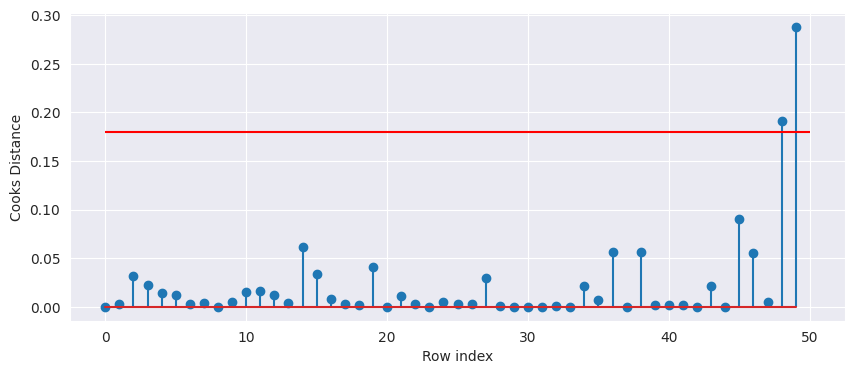

In [29]:
fig=plt.figure(figsize=(10,4))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.hlines(y=0.18,xmin=0,xmax=50,color='red')
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [31]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

In [32]:
np.where(c>=0.18)     #outliers indexes

(array([48, 49]),)

Comment:<br>
* Outliers detected by the cook's distance
* Model needs to improve by deleting the outliers

In [33]:
startup

,R_DSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [34]:
#Discard the data points which are influencers and reasign the row number (reset_index())

startup1=startup.drop(startup.index[[48, 49]],axis=0).reset_index()

In [35]:
#droping the original index

startup1=startup1.drop(['index'],axis=1)

In [36]:
startup1

,R_DSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [37]:
startup1.shape

(48, 4)

In [38]:
startup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_DSpend        48 non-null     float64
 1   Administration  48 non-null     float64
 2   MarketingSpend  48 non-null     float64
 3   Profit          48 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [39]:
startup1.isna().sum()

R_DSpend          0
Administration    0
MarketingSpend    0
Profit            0
dtype: int64

In [40]:
startup1.columns

Index(['R_DSpend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

## Building New Model

In [41]:
model1=smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=startup1 ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.03e-31
Time:                        10:04:01   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
R_DSpend           0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
MarketingSpend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comment:<br>
* we have improve the model by deleting outliers but still the interpretation of coffietient is wrong as addministration is not negatively related to the profit
* model needs more improvisation

In [42]:
model2=smf.ols('Profit~R_DSpend+np.log(Administration)+MarketingSpend',data=startup1 ).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     376.1
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.29e-31
Time:                        10:04:06   Log-Likelihood:                -493.47
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.269e+05   5.61e+04      2.261      0.029    1.38e+04     2.4e+05
R_DSpend                   0.7879      0.036     21.678      0.000       0.715       0.861
np.log(Administration) -6473.0017   4798.323     -1.349      0.184   -1.61e+04    3197.382
MarketingSpend             0.0179      0.013      1.334      0.189      -0.009       0.045
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.427
Skew:                           0.076   Prob(JB):                        0.808
Kurtosis:                       2.564   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model3=smf.ols('Profit~R_DSpend+pow(Administration,2)+MarketingSpend',data=startup1 ).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     379.2
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.92e-31
Time:                        10:04:09   Log-Likelihood:                -493.28
No. Observations:                  48   AIC:                             994.6
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                5.57e+04   3808.269     14.627      0.000     4.8e+04    6.34e+04
R_DSpend                   0.7898      0.036     21.782      0.000       0.717       0.863
pow(Administration, 2) -2.725e-07   1.84e-07     -1.480      0.146   -6.44e-07    9.87e-08
MarketingSpend             0.0164      0.014      1.206      0.234      -0.011       0.044
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.521
Skew:                           0.032   Prob(JB):                        0.771
Kurtosis:                       2.494   Cond. No.                     6.11e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""